In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
     
printmd("bold text") # for bold text

bold text

In [3]:
# Q-Q PLOT
import numpy as np
import pylab
import scipy.stats as stats

#N(0,1)
#generating obsns
# loc =mean, scale =stdd devn,size says generate samples 
#with mean m and scale 1 and 
#generate 1000 such samples
std_normal=np.random.normal(loc=0,scale=1,size=1000)

#0 to 100 th percentiles of std normal
for i in range(0,101):
    print(i,np.percentile(std_normal,i))

0 -3.7441709948104203
1 -2.495902493104947
2 -2.2896685417558684
3 -2.133876785813951
4 -1.9241176684106243
5 -1.7761929734023225
6 -1.7181418757280094
7 -1.6077852061013196
8 -1.5263315074347745
9 -1.4243632724281654
10 -1.3715646107875934
11 -1.3098968761852356
12 -1.2764748745757206
13 -1.2127705998871336
14 -1.179497494583241
15 -1.140538809748783
16 -1.1153705786691606
17 -1.0601606939963073
18 -1.0074652340582062
19 -0.9608475875777619
20 -0.9278821367380233
21 -0.8919211061606442
22 -0.8474483324560356
23 -0.8253080826754386
24 -0.7921973272694982
25 -0.7521262945605457
26 -0.7092809445599058
27 -0.6869213552877051
28 -0.6504952099189912
29 -0.5987493632027056
30 -0.5765720846324958
31 -0.5417075377545272
32 -0.5022668511678192
33 -0.47196951365928075
34 -0.43650755878931313
35 -0.4117946843240371
36 -0.3883971410768521
37 -0.35932240025588097
38 -0.3408870479332937
39 -0.3181520839864804
40 -0.2809102753447725
41 -0.25276203331425895
42 -0.2331244170387088
43 -0.212264492126940

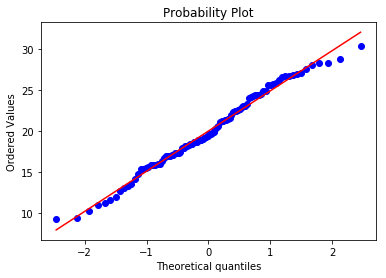

In [4]:
#generate 100 samples from N(20,5)
measurements=np.random.normal(loc=20,scale=5,size=100)

# q-q plot comparsion very easy with pylab

# just compare measurements and a normal distribution
# analyse the generated line
stats.probplot(measurements,dist='norm',plot=pylab)
pylab.show()

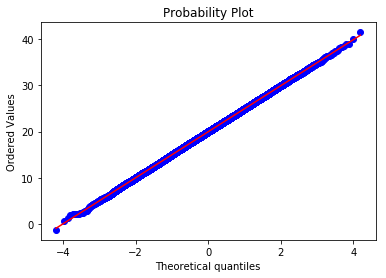

In [5]:
# all points almost lie on line hence gaussian
#but not all 
# is it incorrrect 
#no it is due to less sample size 
#increase sample size and see


measurements=np.random.normal(loc=20,scale=5,size=50000)
stats.probplot(measurements,dist='norm',plot=pylab)
pylab.show()

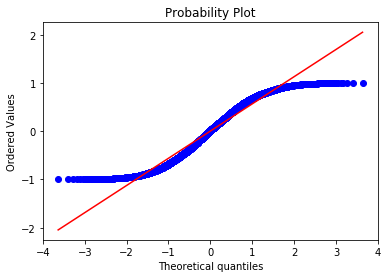

In [6]:
#now we get perfect line

#same can be done for other types like uniform,normal etc

measurements=np.random.uniform(low=-1,high=1,size=5000)
stats.probplot(measurements,dist='norm',plot=pylab)
pylab.show()

#as this is unifrom and nt normal

In [7]:
#code 2

import random
print(random.random()) #any no. bw 0 and 1
#everytime we get different values
 

0.3672003170397351


In [8]:
#say we wanna sample uniformly
# doesn work but method is this only
import pandas as pd
iris=datasets.load_iris()
d=iris.data
d.shape


#sample 30 points randoly fro 150 point datset
n=150;
m=30;
p=m/n;

sampled_data=[];

for i in range(0,n):
    if random.random() <=p:
        sampled_data.append(iris[i,:])
len(sampled_data)

#note the size of sample willbe roughly 30 not perfect 30

NameError: name 'datasets' is not defined

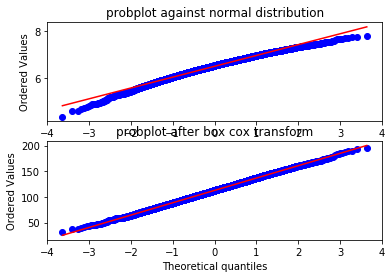

In [2]:
#BOX COX TRANSFORM FOR PARETO DISTRIBUTION 
#TO CONVERT TO GAUSSIAN

from scipy import stats
import matplotlib.pyplot as plt

#generating a non pareto distribution
#checking q-q plot
fig=plt.figure()
ax1=fig.add_subplot(211)
x=stats.loggamma.rvs(5,size=5000) +5 #pareto distbtn for 500 points
prob=stats.probplot(x,dist=stats.norm,plot=ax1) #q-q plot
ax1.set_xlabel('')
ax1.set_title('probplot against normal distribution')


#now use box cox 
ax2=fig.add_subplot(212)
xt,_=stats.boxcox(x) #take values into xt 
prob=stats.probplot(xt,dist=stats.norm,plot=ax2)
#now after box cox we can see that it becomes gaussian
ax2.set_title('probplot after box cox transform')
plt.show()

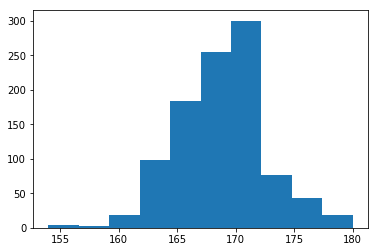

c.i 95 (95.0, 161.9875, 176.0)


In [3]:
#bootstrap samples
import numpy as np
from pandas import read_csv
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

#loading datset
x=np.array([180,162,158,172,168,150,171,183,165,176])

#configure bootstrap
n_iterations=1000  #k
n_size=int(len(x))

#run bootstrap
medians=list()
for i in range(n_iterations):
    #preapre train and test series
    s=resample(x,n_samples=n_size); #for simplicity let m =k
    m=np.median(s);
    #print(m)
    medians.append(m)
    
#plot scores
pyplot.hist(medians)
pyplot.show()

#confidence intervals

alpha=0.95
p=((1.0-alpha)/2.0)*100
lower=np.percentile(medians,p)

p=(alpha+((1.0-alpha)/2.0))*100
upper=np.percentile(medians,p)

print('c.i 95' ,(alpha*100,lower,upper))
    

In [ ]:
#note ci wide coz less size of original data

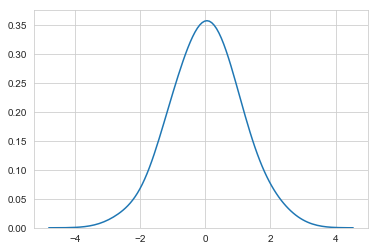

In [4]:
#k-s test
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

#generate a gaussian r.v. X
x=stats.norm.rvs(size=1000); #normal distbn
sns.set_style('whitegrid')
sns.kdeplot(np.array(x),bw=0.5)
plt.show() 

In [5]:
#now  for ks test just one line
stats.kstest(x,'norm')

KstestResult(statistic=0.024382257594984524, pvalue=0.5919023909542844)

In [10]:
#mnist dataset
#loading


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0=pd.read_csv('mnist_train.csv')
print(d0.head(5)) #first 5 rows printed

#save labels to a variable l
l=d0['label']

#drop the label feature and store pixel data in d
d=d0.drop('label',axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [12]:
#now l is having labels and d is having data


In [13]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


C:\Users\NAMAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


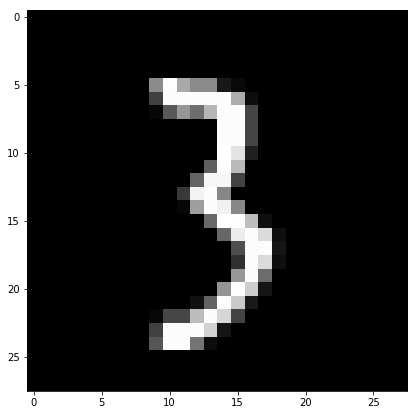

3


In [14]:
#display of a no.
plt.figure(figsize=(7,7))
idx=234

grid_data=d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation='none',cmap='gray')
plt.show()

print(l[idx])

In [15]:
#now pca will start
#very important method for dealing with higher dimensions

In [9]:

#pca self code

#apply on 15k for time being

labels=l.head(15000)
data=d.head(15000)

print("the shape of sample data",data.shape)

NameError: name 'l' is not defined